In [4]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

#  Data
EV_Chargers_Path = "EV_Chargers1.csv"

# Read the data
EV_Chargers_data = pd.read_csv(EV_Chargers_Path)

# Preview data
EV_Chargers_data.head()

,County,Q4 2023,Q3 2023,Q2 2023,Q4 2022,Q3 2022,Q2 2022,Q1 2022,Q4 2021,Q3 2021,Q2 2021,Q1 2021,Q4 2020,Q3 2020,Q2 2020
0,Alameda,5893,4624,4504,4430,4282,5139,5051,3697,3625,3560,3544,3353,3082,2990
1,Alpine,12,10,10,6,16,16,18,14,15,15,15,15,13,12
2,Amador,34,34,34,34,33,33,33,39,40,40,40,40,30,29
3,Butte,157,149,147,146,139,158,132,94,92,91,82,76,76,74
4,Calaveras,23,23,21,25,23,23,21,21,21,19,19,7,7,7


In [5]:
# Data in the form of a list of lists
data = [
    ['Alameda', 5893, 4624, 4504, 4430, 4282, 5139, 5051, 3697, 3625, 3560, 3544, 3353, 3082, 2990],
    ['Alpine', 12, 10, 10, 6, 16, 16, 18, 14, 15, 15, 15, 15, 13, 12],
    ['Amador', 34, 34, 34, 34, 33, 33, 33, 39, 40, 40, 40, 40, 30, 29],
    ['Butte', 157, 149, 147, 146, 139, 158, 132, 94, 92, 91, 82, 76, 76, 74],
    ['Calaveras', 23, 23, 21, 25, 23, 23, 21, 21, 21, 19, 19, 7, 7, 7],
    ['Colusa', 37, 36, 36, 34, 34, 36, 36, 38, 34, 30, 28, 28, 28, 28],
    ['Contra Costa', 1632, 1734, 1674, 1503, 1495, 1699, 1715, 1451, 1483, 1461, 1455, 1355, 1325, 1068],
    ['Del Norte', 46, 47, 47, 39, 39, 32, 32, 29, 29, 25, 25, 30, 30, 30],
    ['El Dorado', 258, 214, 202, 189, 194, 193, 173, 179, 181, 177, 167, 173, 160, 150],
    ['Fresno', 1292, 1313, 1373, 1291, 1158, 1321, 1311, 1133, 1143, 1127, 1092, 921, 779, 684],
    ['Glenn', 8, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14],
    ['Humboldt', 157, 157, 157, 154, 150, 148, 145, 150, 142, 134, 124, 112, 114, 105],
    ['Imperial', 52, 50, 50, 49, 45, 43, 35, 31, 33, 33, 33, 27, 27, 15],
    ['Inyo', 83, 54, 52, 48, 49, 49, 41, 42, 39, 39, 35, 37, 23, 23],
    ['Kern', 832, 797, 721, 691, 646, 629, 631, 416, 359, 306, 298, 279, 279, 241],
    ['Kings', 431, 419, 410, 410, 176, 168, 160, 204, 148, 147, 147, 144, 140, 122],
    ['Lake', 18, 17, 14, 14, 15, 15, 14, 14, 17, 17, 15, 15, 15, 10],
    ['Lassen', 16, 16, 16, 16, 16, 16, 13, 13, 14, 6, 6, 5, 5, 4],
    ['Los Angeles', 31569, 29433, 29051, 27015, 25685, 24615, 23903, 20950, 20520, 20193, 19872, 19236, 18509, 16770],
    ['Madera', 203, 202, 203, 190, 161, 152, 147, 130, 122, 121, 121, 113, 89, 84],
    ['Marin', 1020, 1082, 1048, 1027, 933, 1052, 1037, 739, 734, 730, 728, 706, 684, 629],
    ['Mariposa', 62, 59, 60, 46, 33, 45, 35, 24, 30, 16, 16, 16, 16, 16],
    ['Mendocino', 229, 214, 203, 186, 200, 162, 158, 160, 158, 158, 146, 144, 129, 110],
    ['Merced', 182, 155, 124, 135, 177, 134, 139, 125, 142, 142, 138, 130, 114, 94],
    ['Modoc', 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 4, 4, 4, 4],
    ['Mono', 52, 38, 38, 38, 38, 37, 37, 32, 32, 32, 32, 32, 31, 31],
    ['Monterey', 491, 480, 487, 424, 394, 400, 383, 452, 425, 431, 424, 422, 360, 348],
    ['Napa', 478, 442, 433, 396, 391, 403, 393, 393, 390, 388, 386, 374, 348, 316],
    ['Nevada', 149, 144, 144, 169, 161, 152, 152, 116, 89, 88, 88, 93, 88, 86],
    ['Orange', 6771, 6002, 5797, 5383, 5214, 5189, 5003, 5852, 5657, 5477, 5381, 5242, 4886, 4799],
    ['Placer', 622, 522, 518, 455, 425, 448, 424, 419, 402, 365, 361, 351, 339, 305],
    ['Plumas', 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 5, 5],
    ['Riverside', 1835, 1835, 1745, 1635, 1508, 1493, 1441, 1548, 1495, 1441, 1422, 1464, 1360, 1306],
    ['Sacramento', 2253, 2205, 2149, 2040, 1756, 1839, 1765, 1813, 1836, 1852, 1850, 1777, 1765, 1438],
    ['San Benito', 27, 29, 28, 45, 43, 47, 47, 47, 49, 47, 47, 50, 42, 44],
    ['San Bernardino', 1957, 1841, 1767, 1682, 1615, 1560, 1424, 1367, 1478, 1415, 1395, 1338, 1297, 999],
    ['San Diego', 8583, 8094, 7960, 7735, 7358, 7074, 6551, 10080, 7278, 7199, 7170, 6874, 6760, 6073],
    ['San Francisco', 2431, 2070, 2002, 1952, 1436, 1575, 1519, 1630, 1840, 1671, 1609, 1505, 1384, 1264],
    ['San Joaquin', 825, 728, 680, 632, 612, 596, 565, 442, 407, 402, 397, 389, 326, 306],
    ['San Luis Obispo', 777, 705, 694, 650, 616, 640, 638, 566, 513, 513, 493, 493, 486, 442],
    ['San Mateo', 5533, 4798, 4619, 4557, 4436, 4799, 4688, 4511, 4701, 4459, 4282, 4070, 3758, 3617],
    ['Santa Barbara', 648, 526, 566, 512, 504, 515, 480, 557, 522, 492, 499, 494, 461, 437],
    ['Santa Clara', 20220, 18193, 17865, 17621, 16227, 16981, 16831, 15987, 16498, 16202, 16119, 15406, 14913, 14164],
    ['Santa Cruz', 359, 369, 356, 359, 345, 356, 333, 307, 306, 300, 302, 281, 262, 250],
    ['Shasta', 227, 179, 174, 153, 138, 105, 90, 86, 92, 93, 93, 96, 94, 57],
    ['Sierra', 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    ['Siskiyou', 77, 69, 68, 67, 67, 68, 68, 72, 68, 67, 56, 63, 63, 55],
    ['Solano', 608, 578, 560, 482, 473, 509, 501, 471, 421, 421, 394, 372, 362, 369],
    ['Sonoma', 902, 871, 845, 816, 794, 840, 765, 794, 803, 791, 789, 743, 695, 670],
    ['Stanislaus', 249, 202, 178, 188, 171, 158, 149, 151, 158, 150, 151, 145, 145, 122],
    ['Sutter', 35, 31, 24, 22, 27, 24, 24, 27, 33, 31, 31, 31, 23, 20],
    ['Tehama', 94, 91, 91, 87, 91, 80, 66, 35, 31, 30, 31, 32, 32, 32],
    ['Trinity', 15, 12, 14, 14, 14, 14, 14, 6, 6, 6, 6, 8, 8, 4],
    ['Tulare', 291, 275, 279, 231, 212, 160, 154, 123, 124, 119, 108, 103, 85, 76],
    ['Tuolumne', 55, 54, 54, 58, 60, 52, 52, 78, 54, 50, 50, 47, 47, 45],
    ['Ventura', 930, 875, 870, 858, 810, 821, 273, 14, 11, 11, 11, 11, 13, 749],
    ['Yolo', 468, 432, 427, 412, 398, 428, 679, 894, 894, 893, 892, 845, 868, 264],
    ['Yuba', 69, 80, 79, 75, 59, 60, 299, 394, 388, 386, 386, 324, 328, 14],
    ['Unknown', 3368, 807, 807, 807, 1868, 16, 41, 32, 16, 16, 16, 16, 16, 16]
]

# Columns for the DataFrame
columns = ['County', 'Q4 2023', 'Q3 2023', 'Q2 2023', 'Q1 2023', 'Q4 2022', 'Q3 2022', 'Q2 2022', 
           'Q1 2022', 'Q4 2021', 'Q3 2021', 'Q2 2021', 'Q1 2021', 'Q4 2020', 'Q3 2020']

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Print 
print(df)


             County  Q4 2023  Q3 2023  Q2 2023  Q1 2023  Q4 2022  Q3 2022  \
0           Alameda     5893     4624     4504     4430     4282     5139   
1            Alpine       12       10       10        6       16       16   
2            Amador       34       34       34       34       33       33   
3             Butte      157      149      147      146      139      158   
4         Calaveras       23       23       21       25       23       23   
5            Colusa       37       36       36       34       34       36   
6      Contra Costa     1632     1734     1674     1503     1495     1699   
7         Del Norte       46       47       47       39       39       32   
8         El Dorado      258      214      202      189      194      193   
9            Fresno     1292     1313     1373     1291     1158     1321   
10            Glenn        8       14       14       14       14       14   
11         Humboldt      157      157      157      154      150      148   

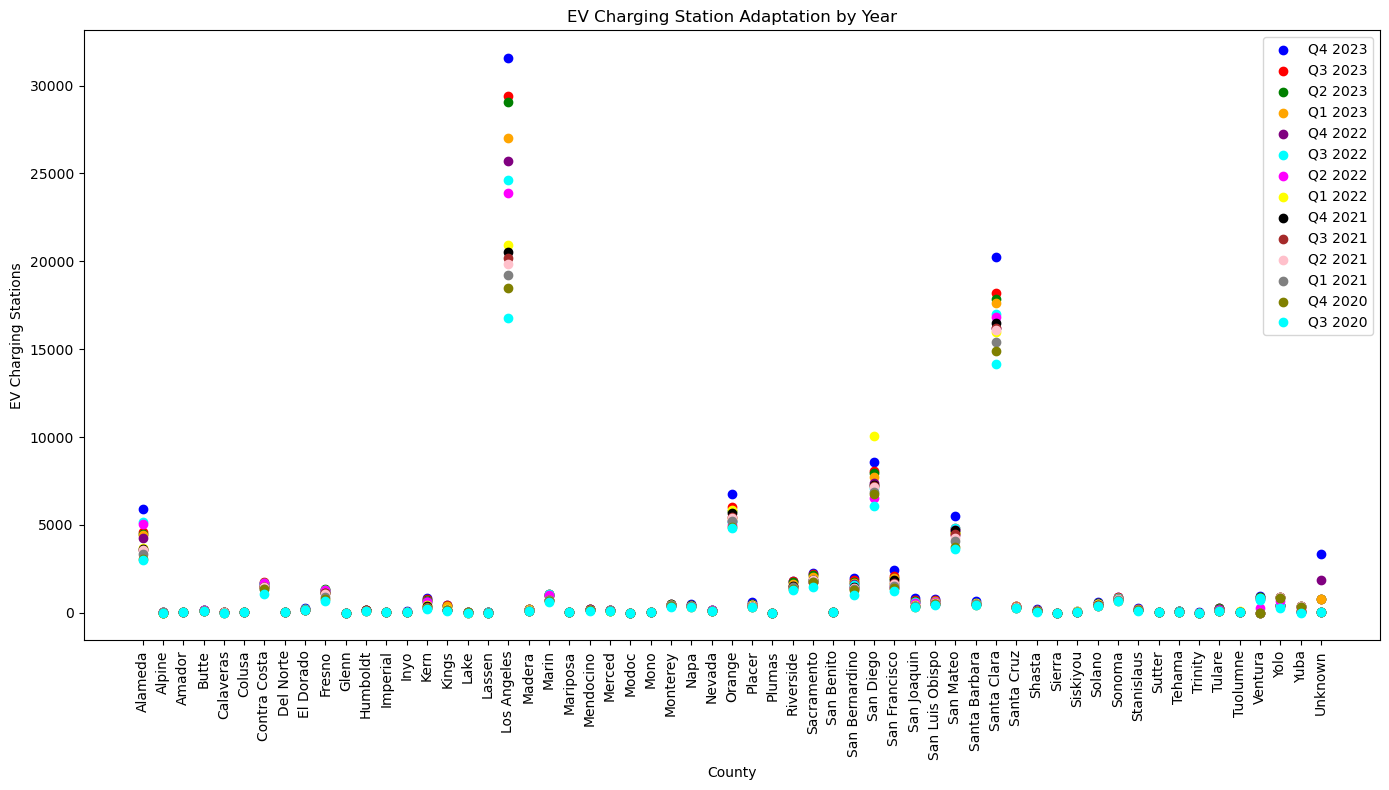

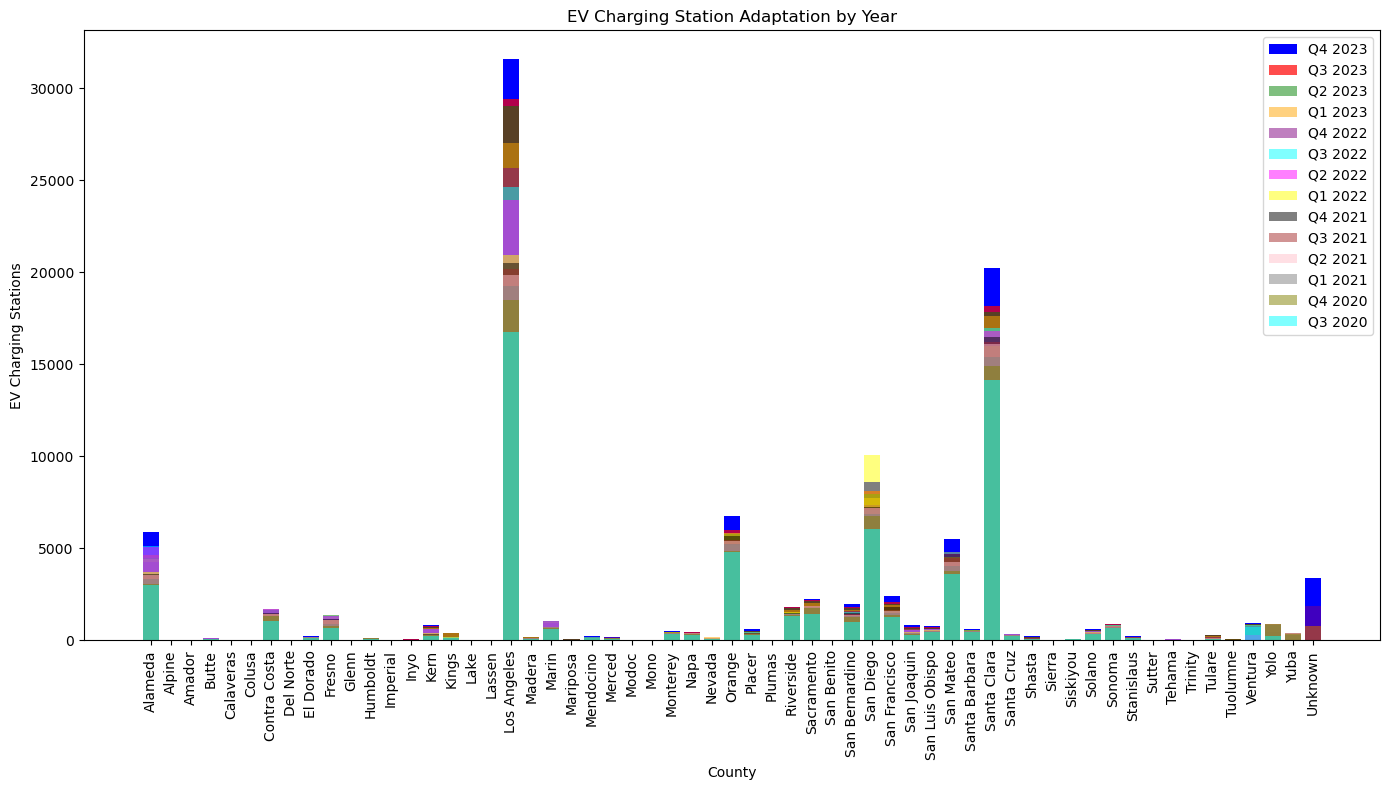

In [6]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(14, 8))
plt.scatter(df['County'], df['Q4 2023'], color='blue', label='Q4 2023')
plt.scatter(df['County'], df['Q3 2023'], color='red', label='Q3 2023')
plt.scatter(df['County'], df['Q2 2023'], color='green', label='Q2 2023')
plt.scatter(df['County'], df['Q1 2023'], color='orange', label='Q1 2023')
plt.scatter(df['County'], df['Q4 2022'], color='purple', label='Q4 2022')
plt.scatter(df['County'], df['Q3 2022'], color='cyan', label='Q3 2022')
plt.scatter(df['County'], df['Q2 2022'], color='magenta', label='Q2 2022')
plt.scatter(df['County'], df['Q1 2022'], color='yellow', label='Q1 2022')
plt.scatter(df['County'], df['Q4 2021'], color='black', label='Q4 2021')
plt.scatter(df['County'], df['Q3 2021'], color='brown', label='Q3 2021')
plt.scatter(df['County'], df['Q2 2021'], color='pink', label='Q2 2021')
plt.scatter(df['County'], df['Q1 2021'], color='gray', label='Q1 2021')
plt.scatter(df['County'], df['Q4 2020'], color='olive', label='Q4 2020')
plt.scatter(df['County'], df['Q3 2020'], color='cyan', label='Q3 2020')

plt.xlabel('County')
plt.ylabel('EV Charging Stations')
plt.title('EV Charging Station Adaptation by Year')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Bar plot
plt.figure(figsize=(14, 8))
plt.bar(df['County'], df['Q4 2023'], color='blue', label='Q4 2023')
plt.bar(df['County'], df['Q3 2023'], color='red', label='Q3 2023', alpha=0.7)
plt.bar(df['County'], df['Q2 2023'], color='green', label='Q2 2023', alpha=0.5)
plt.bar(df['County'], df['Q1 2023'], color='orange', label='Q1 2023', alpha=0.5)
plt.bar(df['County'], df['Q4 2022'], color='purple', label='Q4 2022', alpha=0.5)
plt.bar(df['County'], df['Q3 2022'], color='cyan', label='Q3 2022', alpha=0.5)
plt.bar(df['County'], df['Q2 2022'], color='magenta', label='Q2 2022', alpha=0.5)
plt.bar(df['County'], df['Q1 2022'], color='yellow', label='Q1 2022', alpha=0.5)
plt.bar(df['County'], df['Q4 2021'], color='black', label='Q4 2021', alpha=0.5)
plt.bar(df['County'], df['Q3 2021'], color='brown', label='Q3 2021', alpha=0.5)
plt.bar(df['County'], df['Q2 2021'], color='pink', label='Q2 2021', alpha=0.5)
plt.bar(df['County'], df['Q1 2021'], color='gray', label='Q1 2021', alpha=0.5)
plt.bar(df['County'], df['Q4 2020'], color='olive', label='Q4 2020', alpha=0.5)
plt.bar(df['County'], df['Q3 2020'], color='cyan', label='Q3 2020', alpha=0.5)

plt.xlabel('County')
plt.ylabel('EV Charging Stations')
plt.title('EV Charging Station Adaptation by Year')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


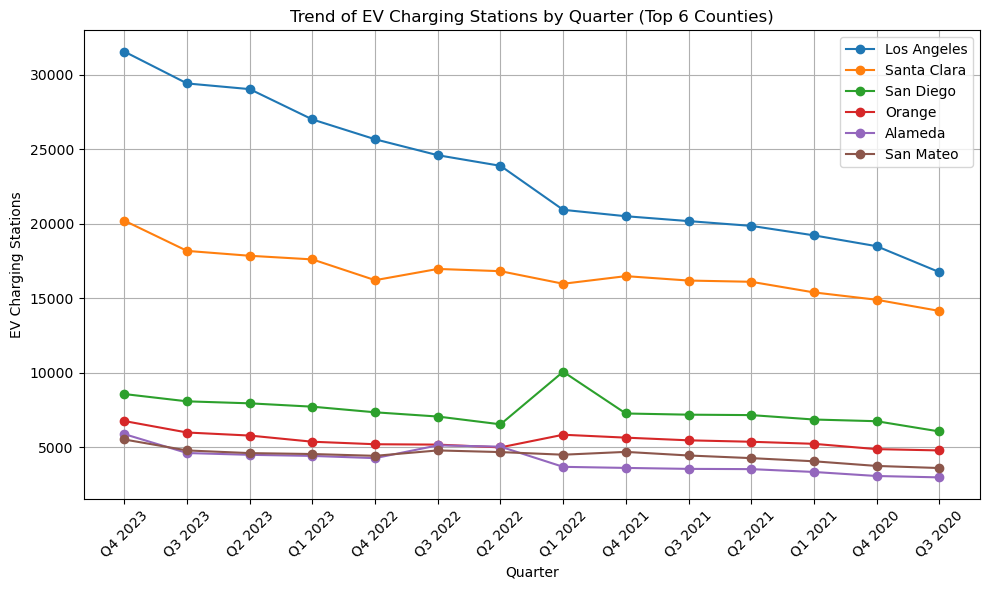

In [8]:
# Line plot for top 6 counties
plt.figure(figsize=(10, 6))

for county in top_counties['County']:
    plt.plot(df.columns[1:], top_counties.loc[top_counties['County'] == county].values[0][1:], marker='o', label=county)

plt.xlabel('Quarter')
plt.ylabel('EV Charging Stations')
plt.title('Trend of EV Charging Stations by Quarter (Top 6 Counties)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
